In [57]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch import nn 
from torch.utils.data import DataLoader
from torch import optim
import matplotlib.pyplot as plt
train_data = CIFAR10(root='data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [53]:
class Cifar10_clf(nn.Module):
    def __init__(self):
        super(Cifar10_clf, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self ,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
model = Cifar10_clf().to(device)

In [63]:
loss_fn = nn.CrossEntropyLoss()
optim_fn = optim.AdamW(model.parameters(), 0.0001)

In [64]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
loss_history = []
def training_loop(epochs):
    model.train()
    running_loss = 0.0
    for epoch in range(epochs):
        
        for batch in train_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            # 1. Forward pass
            outputs = model(inputs)

            # 2. Compute loss
            loss = loss_fn(outputs, labels)

            # 3. Backward pass
            loss.backward()

            # 4. Optimizer step (update weights)
            optim_fn.step()

            # 5. Zero gradients for the next iteration
            optim_fn.zero_grad()

            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)

        if epoch % 3 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
            
        if epoch % 5 == 0:
            plot_loss(loss_history)

def plot_loss(loss_list):
    plt.figure(figsize=(8, 4))
    plt.plot(loss_list)
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

Epoch 1/6, Loss: 0.4820


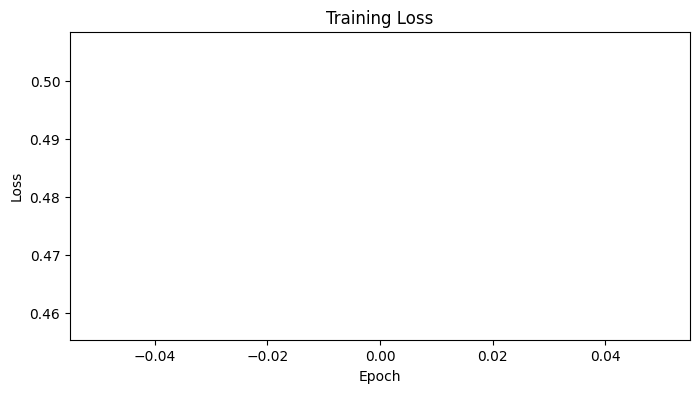

Epoch 4/6, Loss: 1.6541


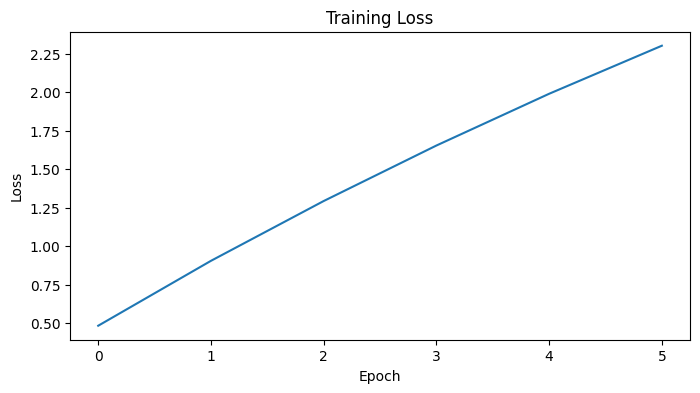

In [65]:
training_loop(6)